# MATH1042 Uji Hipotesis

<b>Kelompok 08</b>
<ol>
<li>Christopher Nathaniel Tanamas // 222200153</li>
<li>Grace Calista Lim // 222102176</li>
<li>Jemima Alithia Sigar // 222101393</li>
<li>Samuel Revaldo Tjahyadi // 222102304</li>
</ol>

# Importing Libraries

In [74]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.weightstats import ztest

# Menampilkan DataFrame

In [75]:
# simpan data sampel dalam suatu list
df_siang = pd.read_csv("Waktu_Makan_DH-Siang.csv")
df_siang = df_siang.dropna()
display(df_siang.head(10))

df_malam = pd.read_csv("Waktu_Makan_DH-Malam.csv")
df_malam = df_malam.dropna()
display (df_malam.head(10))

,Nama,Gender,Mulai,Selesai,Durasi
0,Andrea,P,12:10:00 PM,12:20:00 PM,0:10:00
1,Karyn,P,12:10:00 PM,12:20:00 PM,0:10:00
2,Felicia,P,12:10:00 PM,12:20:00 PM,0:10:00
3,Ionna,P,12:10:00 PM,12:20:00 PM,0:10:00
4,Fredrik,L,12:10:00 PM,12:24:00 PM,0:14:00
5,Kenji,L,12:10:00 PM,12:24:00 PM,0:14:00
6,Anna,P,12:19:00 PM,12:28:00 PM,0:09:00
7,Louis H,L,12:19:00 PM,12:27:00 PM,0:08:00
8,Gerwin,L,12:20:00 PM,12:26:00 PM,0:06:00
9,Palti,L,12:20:00 PM,12:27:00 PM,0:07:00


,Nama,Gender,Mulai,Selesai,Durasi
0,Christopher,L,5:35:00 PM,5:51:00 PM,0:16:00
1,Graceela,P,5:35:00 PM,5:55:00 PM,0:20:00
2,Rendi,L,5:33:00 PM,5:47:00 PM,0:14:00
3,Xander,L,5:35:00 PM,5:47:00 PM,0:12:00
4,Reuben,L,5:35:00 PM,5:50:00 PM,0:15:00
5,Hizkia,L,5:36:00 PM,5:48:00 PM,0:12:00
6,Giovanny,P,5:51:00 PM,6:12:00 PM,0:21:00
7,Wesley,L,5:51:00 PM,6:04:00 PM,0:13:00
8,Clarissa,P,5:35:00 PM,5:49:00 PM,0:14:00
9,Theophorus,L,5:56:00 PM,6:05:00 PM,0:09:00


In [76]:
# menggabungkan dua dataframe
df_combined = pd.concat([df_siang, df_malam], ignore_index=True)
# Display hasil gabungan DataFrame
display(df_combined)

,Nama,Gender,Mulai,Selesai,Durasi
0,Andrea,P,12:10:00 PM,12:20:00 PM,0:10:00
1,Karyn,P,12:10:00 PM,12:20:00 PM,0:10:00
2,Felicia,P,12:10:00 PM,12:20:00 PM,0:10:00
3,Ionna,P,12:10:00 PM,12:20:00 PM,0:10:00
4,Fredrik,L,12:10:00 PM,12:24:00 PM,0:14:00
...,...,...,...,...,...
96,Laurin,P,5:34:00 PM,5:52:00 PM,0:18:00
97,Gilbert G,L,5:30:00 PM,5:44:00 PM,0:14:00
98,Niel,L,5:45:00 PM,6:00:00 PM,0:15:00
99,Shem,L,5:45:00 PM,6:00:00 PM,0:15:00


# Prapemrosesan Data
### Mengubah format durasi dari waktu ke integer dalam satuan menit

In [77]:
# fungsi mengubah format durasi "1:10:00" menjadi "70" dalam menit
def convert_to_minutes(value):
    # konversi dari jam ke menit
    minutes = int(value.split(":")[0]) * 60
    
    # menambahkan jam dengan menit
    minutes = minutes + int(value.split(":")[1])
    return minutes

df_siang["Durasi"] = df_siang["Durasi"].apply(convert_to_minutes)

df_malam["Durasi"] = df_malam["Durasi"].apply(convert_to_minutes)

df_combined["Durasi"] = df_combined["Durasi"].apply(convert_to_minutes)

display(df_combined.head(10))

,Nama,Gender,Mulai,Selesai,Durasi
0,Andrea,P,12:10:00 PM,12:20:00 PM,10
1,Karyn,P,12:10:00 PM,12:20:00 PM,10
2,Felicia,P,12:10:00 PM,12:20:00 PM,10
3,Ionna,P,12:10:00 PM,12:20:00 PM,10
4,Fredrik,L,12:10:00 PM,12:24:00 PM,14
5,Kenji,L,12:10:00 PM,12:24:00 PM,14
6,Anna,P,12:19:00 PM,12:28:00 PM,9
7,Louis H,L,12:19:00 PM,12:27:00 PM,8
8,Gerwin,L,12:20:00 PM,12:26:00 PM,6
9,Palti,L,12:20:00 PM,12:27:00 PM,7


# Data Keseluruhan

## Exploratory Data Analysis (EDA)

### Menampilkan Informasi Data

In [78]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Nama     101 non-null    object
 1   Gender   101 non-null    object
 2   Mulai    101 non-null    object
 3   Selesai  101 non-null    object
 4   Durasi   101 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 4.1+ KB


In [79]:
df_combined.describe()

,Durasi
count,101.000000
mean,18.821782
std,10.993995
min,6.000000
25%,12.000000
50%,16.000000
75%,21.000000
max,60.000000


### Bar Chart Banyaknya Sampel Berdasarkan Gender

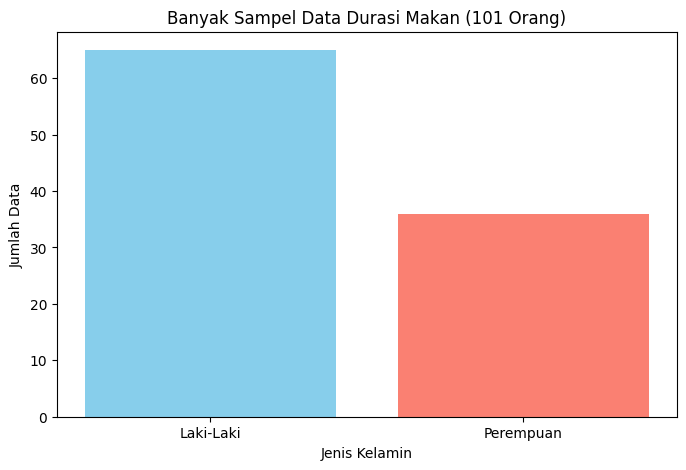

In [80]:
# panggil Series untuk kolom "Gender"
gender_series = df_combined["Gender"]

# konversi menjadi tabel frekuensi
freq_table = gender_series.value_counts()

# Membangun Bar Chart dengan Matplotlib
# Membangun list nilai x dan y untuk digambar di bar chart
x = freq_table.index.to_list()
y = freq_table.to_list()

# mendefinisikan kanvas untuk menggambar diagram
fig = plt.figure(figsize =(8, 5)) 

# perintah untuk menggambar diagram di kanvas
plt.bar(x, y, color=['skyblue','salmon'])

# Mengubah label pada sumbu x
plt.xticks(x, ["Laki-Laki", "Perempuan"])  # Mengganti "L" menjadi "Laki-Laki" dan "P" menjadi "Perempuan"

# perintah untuk memberi label sumbu x dan y
plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah Data")

# perintah untuk memberi judul diagram
plt.title("Banyak Sampel Data Durasi Makan (101 Orang)")

# perintah untuk menampilkan gambar di kanvas
plt.show()

### Box Plot Sebaran Sampel Berdasarkan Gender

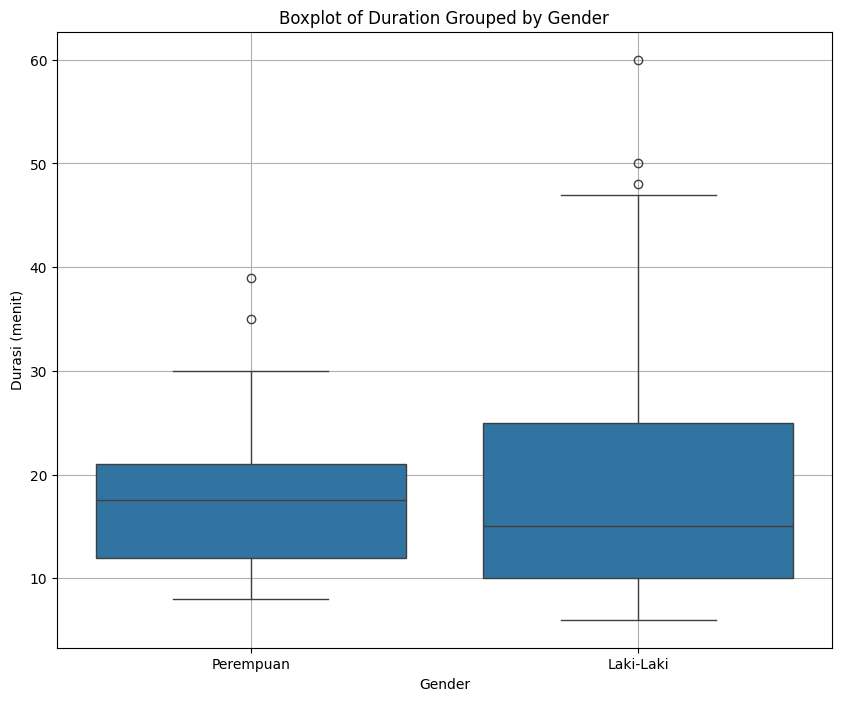

In [81]:
fig = plt.figure(figsize =(10, 8))
sns.boxplot(data=df_combined, x="Gender", y="Durasi")
plt.grid()
plt.xticks(x, ["Laki-Laki", "Perempuan"])  # Mengganti "L" menjadi "Laki-Laki" dan "P" menjadi "Perempuan"
plt.ylabel("Durasi (menit)")
plt.title("Boxplot of Duration Grouped by Gender")
plt.show()

# Analisis Statistika

In [82]:
durasi = df_combined[['Durasi']]
durasi_array = np.array(durasi)

n_sampel_durasi = len(durasi_array)
x_bar_sampel_durasi = np.mean(durasi_array)
s_sampel_durasi = stats.tstd(durasi_array)[0]

print("### MENGHITUNG STATISTIK SAMPEL DURASI ###")
print("Total data DURASI sampel\t: {}".format(n_sampel_durasi))
print("Rata-rata data DURASI sampel\t: {}".format(x_bar_sampel_durasi))
print("Stdev data DURASI sampel\t: {}".format(s_sampel_durasi))

### MENGHITUNG STATISTIK SAMPEL DURASI ###
Total data DURASI sampel	: 101
Rata-rata data DURASI sampel	: 18.821782178217823
Stdev data DURASI sampel	: 10.993994760417126


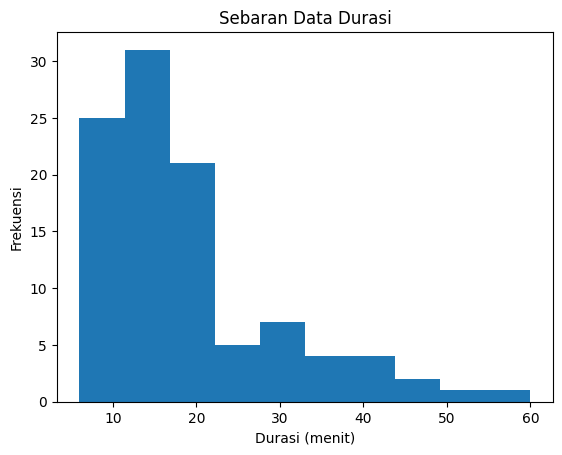

In [83]:
# visualisasi sebaran data durasi

plt.hist(durasi_array)
plt.xlabel("Durasi (menit)")
plt.ylabel("Frekuensi")
plt.title("Sebaran Data Durasi")
plt.show()

# **Masalah 1**

## Formulasikan Hipotesis


Misalkan $X$ menyatakan variabel acak dari nilai durasi mahasiswa menghabiskan waktu untuk makan di DH, dalam satuan menit. Untuk menguji apakah pernyataan "$\mu_X ≤ 25$" sahih secara statistika, maka tuliskan pernyataan "$\mu_X > 25$" sebagai **hipotesis tandingan ($H_1$)**, yaitu

$$
\begin{align*}
H_0&: \mu_X ≤ 25\\
H_1&: \mu_X > 25
\end{align*}
$$

## Pilih Tingkat Signifikansi

In [84]:
# variabel alpha menyatakan tingkat signifikansi
# artinya 1 - alpha adalah tingkat keyakinan
alpha = 0.05

## Pilih Statistik yang sesuai

Berikut hal yang menentukan pemilihan statistik:
* Yang hendak diuji dalam hipotesis adalah **rata-rata** populasi.
* Terdapat **satu** buah populasi yang terlibat dalam uji hipotesis.
* Jenis uji hipotesis yang dilakukan adalah **satu sisi**.
* Terdapat 101 data sampel, jadi hanya ada **banyak** ukuran data sampelnya.

Berdasarkan poin-poin pertimbangan di atas, maka jenis statistik yang dipilih adalah **distribusi Z untuk 1 populasi**.

## Hitung nilai P-value dari statistik

In [85]:
# popmean adalah nilai tebakan dalam pernyataan hipotesis
popmean = 25

# alternative_type adalah sebuah string untuk menandakan jenis hipotesis tandingan (H_1) yang diharapkan
# nilai string yang dapat dipilih:
#     - 'two-sided': artinya H_1 memiliki format mu_x != popmean;
#     - 'smaller': artinya H_1 memiliki format mu_x < popmean;
#     - 'larger': artinya H_1 memiliki format mu_x > popmean.
alternative_type = 'larger'

# method akan memberikan 2 return value, yaitu nilai statistic z-score dan nilai p-valuenya
statistic , pvalue = ztest(durasi_array, value=popmean, alternative=alternative_type)
print(f"Statistic\t: {statistic[0]:.3f}")
print(f"P-Value  \t: {pvalue[0]:.3e}")

Statistic	: -5.648
P-Value  	: 1.000e+00


## Buat Kesimpulan berdasarkan P-value

In [86]:
def conclude_test(pvalue, alpha):
    print("Hypothesis Testing Result:")
    print("-----------------------------")
    if (pvalue > alpha):
        print(f"\tWith confidence level {(1-alpha)*100:3.0f}%, it failed to reject the Null Hypothesis.")
    else:
        print(f"\tWith confidence level {(1-alpha)*100:3.0f}%, it is statistically valid to reject the Null Hypothesis.")

conclude_test(pvalue, alpha)

Hypothesis Testing Result:
-----------------------------
	With confidence level  95%, it failed to reject the Null Hypothesis.


## Terjemahkan ke bahasa sehari-hari

**Kesimpulan:**

Dengan tingkat keyakinan 95%, uji hipotesis belum cukup bukti untuk menyimpulkan bahwa durasi makan mahasiswa CIT tidak lebih dari 25 menit.

## Formulasikan Hipotesis (2)


Misalkan $X$ menyatakan variabel acak dari nilai durasi mahasiswa menghabiskan waktu untuk makan di DH, dalam satuan menit. Untuk menguji apakah pernyataan "$\mu_X ≥ 25$" sahih secara statistika, maka tuliskan pernyataan "$\mu_X < 25$" sebagai **hipotesis tandingan ($H_1$)**, yaitu

$$
\begin{align*}
H_0&: \mu_X ≥ 25\\
H_1&: \mu_X < 25
\end{align*}
$$

## Pilih Tingkat Signifikansi

In [87]:
# variabel alpha menyatakan tingkat signifikansi
# artinya 1 - alpha adalah tingkat keyakinan
alpha = 0.05

## Pilih Statistik yang sesuai

Berikut hal yang menentukan pemilihan statistik:
* Yang hendak diuji dalam hipotesis adalah **rata-rata** populasi.
* Terdapat **satu** buah populasi yang terlibat dalam uji hipotesis.
* Jenis uji hipotesis yang dilakukan adalah **satu sisi**.
* Terdapat 101 data sampel, jadi hanya ada **banyak** ukuran data sampelnya.

Berdasarkan poin-poin pertimbangan di atas, maka jenis statistik yang dipilih adalah **distribusi Z untuk 1 populasi**.

## Hitung nilai P-value dari statistik

In [88]:
# popmean adalah nilai tebakan dalam pernyataan hipotesis
popmean = 25

# alternative_type adalah sebuah string untuk menandakan jenis hipotesis tandingan (H_1) yang diharapkan
# nilai string yang dapat dipilih:
#     - 'two-sided': artinya H_1 memiliki format mu_x != popmean;
#     - 'smaller': artinya H_1 memiliki format mu_x < popmean;
#     - 'larger': artinya H_1 memiliki format mu_x > popmean.
alternative_type = 'smaller'

# method akan memberikan 2 return value, yaitu nilai statistic z-score dan nilai p-valuenya
statistic , pvalue = ztest(durasi_array, value=popmean, alternative=alternative_type)
print(f"Statistic\t: {statistic[0]:.3f}")
print(f"P-Value  \t: {pvalue[0]:.3e}")

Statistic	: -5.648
P-Value  	: 8.132e-09


## Buat Kesimpulan berdasarkan P-value

In [89]:
def conclude_test(pvalue, alpha):
    print("Hypothesis Testing Result:")
    print("-----------------------------")
    if (pvalue > alpha):
        print(f"\tWith confidence level {(1-alpha)*100:3.0f}%, it failed to reject the Null Hypothesis.")
    else:
        print(f"\tWith confidence level {(1-alpha)*100:3.0f}%, it is statistically valid to reject the Null Hypothesis.")

conclude_test(pvalue, alpha)

Hypothesis Testing Result:
-----------------------------
	With confidence level  95%, it is statistically valid to reject the Null Hypothesis.


## Terjemahkan ke bahasa sehari-hari

**Kesimpulan:**

Dengan tingkat keyakinan 95%, uji hipotesis memiliki cukup bukti untuk menolak bahwa rata-rata durasi makan mahasiswa CIT tidak kurang dari 25 menit. Dengan kata lain, hipotesis yang mengatakan bahwa mahasiswa CIT makan dengan durasi waktu lebih dari sama dengan 25 menit adalah tidak valid.

# **Masalah 2**

## Formulasikan Hipotesis


Misalkan $X$ menyatakan variabel acak dari standar deviasi durasi mahasiswa menghabiskan waktu untuk makan di DH, dalam satuan menit. Untuk menguji apakah pernyataan "$\sigma_X^2 ≤ 25$" sahih secara statistika, maka tuliskan pernyataan "$\sigma_X^2 > 25$" sebagai **hipotesis tandingan ($H_1$)**, yaitu

$$
\begin{align*}
H_0&: \sigma_X^2 ≤ 25\\
H_1&: \sigma_X^2 > 25
\end{align*}
$$

## Pilih Tingkat Signifikansi

In [90]:
# variabel alpha menyatakan tingkat signifikansi
# artinya 1 - alpha adalah tingkat keyakinan
alpha = 0.05

## Menghitung Statistik Uji dan Critical Region

In [91]:
# menghitung statistik uji
degree_of_freedom = n_sampel_durasi-1
statistik_uji = (degree_of_freedom * ((s_sampel_durasi) ** 2))/25

# mencari nilai c_alpha_half sehingga P(Chi<c_alpha_half) = alpha/2
batas_critical_region = stats.chi2.ppf(alpha, degree_of_freedom)

def conclude_test(batas_critical_region, statistik_uji):
    print("Hypothesis Testing Result:")
    print("-----------------------------")
    if (batas_critical_region > statistik_uji):
        print(f"\tWith confidence level {(1-alpha)*100:3.0f}%, it failed to reject the Null Hypothesis.")
    else:
        print(f"\tWith confidence level {(1-alpha)*100:3.0f}%, it is statistically valid to reject the Null Hypothesis.")

print("### MEMBANGUN STATISTIK UJI DAN CRITICAL REGION ###")
print("Statistik Uji    \t: {}".format(statistik_uji))
print("Derajat Kebebasan\t: {}".format(degree_of_freedom))
print("Batas Critical Region\t: {}".format(batas_critical_region))

conclude_test(batas_critical_region, statistik_uji)

### MEMBANGUN STATISTIK UJI DAN CRITICAL REGION ###
Statistik Uji    	: 483.4716831683168
Derajat Kebebasan	: 100
Batas Critical Region	: 77.92946516501726
Hypothesis Testing Result:
-----------------------------
	With confidence level  95%, it is statistically valid to reject the Null Hypothesis.


## Terjemahkan ke bahasa sehari-hari

**Kesimpulan:**

Dengan tingkat keyakinan 95%, uji hipotesis memiliki cukup bukti untuk menolak pernyataan bahwa standar deviasi keseluruhan durasi mahasiswa makan di DH tidak lebih dari $5$ menit.

# **Masalah 3**

In [92]:
df_laki_laki = df_combined[df_combined['Gender'] == 'L']
df_perempuan = df_combined[df_combined['Gender'] == 'P']

display(df_laki_laki.head(10))
display(df_perempuan.head(10))

,Nama,Gender,Mulai,Selesai,Durasi
4,Fredrik,L,12:10:00 PM,12:24:00 PM,14
5,Kenji,L,12:10:00 PM,12:24:00 PM,14
7,Louis H,L,12:19:00 PM,12:27:00 PM,8
8,Gerwin,L,12:20:00 PM,12:26:00 PM,6
9,Palti,L,12:20:00 PM,12:27:00 PM,7
10,Jonathan T,L,12:20:00 PM,12:28:00 PM,8
11,Feivel,L,12:20:00 PM,12:27:00 PM,7
12,David,L,12:20:00 PM,12:27:00 PM,7
14,Christopher,L,12:19:00 PM,12:28:00 PM,9
16,Albert,L,12:16:00 PM,12:38:00 PM,22


,Nama,Gender,Mulai,Selesai,Durasi
0,Andrea,P,12:10:00 PM,12:20:00 PM,10
1,Karyn,P,12:10:00 PM,12:20:00 PM,10
2,Felicia,P,12:10:00 PM,12:20:00 PM,10
3,Ionna,P,12:10:00 PM,12:20:00 PM,10
6,Anna,P,12:19:00 PM,12:28:00 PM,9
13,Graceela,P,12:19:00 PM,12:27:00 PM,8
15,Brygitta,P,12:10:00 PM,12:28:00 PM,18
17,Jemima,P,12:03:00 PM,12:18:00 PM,15
18,Aurel A.H,P,12:03:00 PM,12:20:00 PM,17
19,Laurin,P,11:59:00 AM,12:17:00 PM,18


In [93]:
durasi_lelaki = df_laki_laki[['Durasi']]
durasi_lelaki_array = np.array(durasi_lelaki)

n_sampel_lelaki = len(durasi_lelaki_array)
x_bar_sampel_lelaki = np.mean(durasi_lelaki_array)
s_sampel_lelaki = stats.tstd(durasi_lelaki_array)[0]

print("### MENGHITUNG STATISTIK SAMPEL DURASI ###")
print("Total data DURASI LELAKI sampel\t\t: {}".format(n_sampel_lelaki))
print("Rata-rata data DURASI LELAKI sampel\t: {}".format(x_bar_sampel_lelaki))
print("Stdev data DURASI LELAKI sampel\t\t: {}".format(s_sampel_lelaki))

### MENGHITUNG STATISTIK SAMPEL DURASI ###
Total data DURASI LELAKI sampel		: 65
Rata-rata data DURASI LELAKI sampel	: 19.353846153846153
Stdev data DURASI LELAKI sampel		: 12.523017269750191


In [94]:
durasi_perempuan = df_perempuan[['Durasi']]
durasi_perempuan_array = np.array(durasi_perempuan)

n_sampel_perempuan = len(durasi_perempuan_array)
x_bar_sampel_perempuan = np.mean(durasi_perempuan_array)
s_sampel_perempuan = stats.tstd(durasi_perempuan_array)[0]

print("### MENGHITUNG STATISTIK SAMPEL DURASI ###")
print("Total data DURASI PEREMPUAN sampel\t: {}".format(n_sampel_perempuan))
print("Rata-rata data DURASI PEREMPUAN sampel\t: {}".format(x_bar_sampel_perempuan))
print("Stdev data DURASI PEREMPUAN sampel\t: {}".format(s_sampel_perempuan))

### MENGHITUNG STATISTIK SAMPEL DURASI ###
Total data DURASI PEREMPUAN sampel	: 36
Rata-rata data DURASI PEREMPUAN sampel	: 17.86111111111111
Stdev data DURASI PEREMPUAN sampel	: 7.556086582646102


## Formulasikan Hipotesis 1


Misalkan $X$ menyatakan variabel acak dari nilai durasi mahasiswa menghabiskan waktu untuk makan di DH, dalam satuan menit. Untuk menguji apakah pernyataan "$\mu_X (Lelaki) ≤ \mu_X (Perempuan)$" sahih secara statistika, maka tuliskan pernyataan "$\mu_X (Lelaki) > \mu_X (Perempuan)$" sebagai **hipotesis tandingan ($H_1$)**, yaitu

$$
\begin{align*}
H_0&: \mu_X (Lelaki) ≤ \mu_X (Perempuan)\\
H_1&: \mu_X (Lelaki) > \mu_X (Perempuan)
\end{align*}
$$

## Pilih Tingkat Signifikansi

In [95]:
# variabel alpha menyatakan tingkat signifikansi
# artinya 1 - alpha adalah tingkat keyakinan
alpha = 0.05

## Hitung nilai P-value dari statistik

In [96]:
alternative_type = 'larger'

# method akan memberikan 2 return value, yaitu nilai statistic z-score dan nilai p-valuenya
statistic , pvalue = ztest(durasi_lelaki_array, durasi_perempuan_array, alternative=alternative_type)
print(f"Statistic\t: {statistic[0]:.3f}")
print(f"P-Value  \t: {pvalue[0]:.3e}")

Statistic	: 0.652
P-Value  	: 2.573e-01


## Buat Kesimpulan berdasarkan P-value

In [97]:
def conclude_test(pvalue, alpha):
    print("Hypothesis Testing Result:")
    print("-----------------------------")
    if (pvalue > alpha):
        print(f"\tWith confidence level {(1-alpha)*100:3.0f}%, it failed to reject the Null Hypothesis.")
    else:
        print(f"\tWith confidence level {(1-alpha)*100:3.0f}%, it is statistically valid to reject the Null Hypothesis.")

conclude_test(pvalue, alpha)

Hypothesis Testing Result:
-----------------------------
	With confidence level  95%, it failed to reject the Null Hypothesis.


## Terjemahkan ke bahasa sehari-hari

**Kesimpulan:**

Dengan tingkat keyakinan 95%, uji hipotesis tidak memiliki cukup bukti untuk menyimpulkan bahwa laki-laki makan lebih cepat atau setara dengan waktu makan perempuan.

## Formulasikan Hipotesis 2


Misalkan $X$ menyatakan variabel acak dari nilai durasi mahasiswa menghabiskan waktu untuk makan di DH, dalam satuan menit. Untuk menguji apakah pernyataan "$\mu_X (Lelaki) ≥ \mu_X (Perempuan)$" sahih secara statistika, maka tuliskan pernyataan "$\mu_X (Lelaki) < \mu_X (Perempuan)$" sebagai **hipotesis tandingan ($H_1$)**, yaitu

$$
\begin{align*}
H_0&: \mu_X (Lelaki) ≥ \mu_X (Perempuan)\\
H_1&: \mu_X (Lelaki) < \mu_X (Perempuan)
\end{align*}
$$

# Pilih Tingkat Signifikansi

In [98]:
# variabel alpha menyatakan tingkat signifikansi
# artinya 1 - alpha adalah tingkat keyakinan
alpha = 0.05

## Hitung nilai P-value dari statistik

In [99]:
alternative_type = 'smaller'

z_statistic, pvalue2 = ztest(durasi_lelaki_array, durasi_perempuan_array, alternative=alternative_type)

print(f"Statistic\t: {z_statistic[0]:.3f}")
print(f"P-Value  \t: {pvalue2[0]:.3e}")

Statistic	: 0.652
P-Value  	: 7.427e-01


## Buat Kesimpulan berdasarkan P-value

In [100]:
def conclude_test(pvalue, alpha):
    print("Hypothesis Testing Result:")
    print("-----------------------------")
    if (pvalue > alpha):
        print(f"\tWith confidence level {(1-alpha)*100:3.0f}%, it failed to reject the Null Hypothesis.")
    else:
        print(f"\tWith confidence level {(1-alpha)*100:3.0f}%, it is statistically valid to reject the Null Hypothesis.")

conclude_test(pvalue, alpha)

Hypothesis Testing Result:
-----------------------------
	With confidence level  95%, it failed to reject the Null Hypothesis.


## Terjemahkan ke bahasa sehari-hari

**Kesimpulan:**

Dengan tingkat keyakinan 95%, uji hipotesis tidak memiliki cukup bukti untuk menyimpulkan bahwa laki-laki makan lebih lama atau setara dengan waktu makan perempuan.

## Formulasikan Hipotesis 3


Misalkan $X$ menyatakan variabel acak dari nilai durasi mahasiswa menghabiskan waktu untuk makan di DH, dalam satuan menit. Untuk menguji apakah pernyataan "$\mu_X (Lelaki) = \mu_X (Perempuan)$" sahih secara statistika, maka tuliskan pernyataan "$\mu_X (Lelaki) ≠ \mu_X (Perempuan)$" sebagai **hipotesis tandingan ($H_1$)**, yaitu

$$
\begin{align*}
H_0&: \mu_X (Lelaki) = \mu_X (Perempuan)\\
H_1&: \mu_X (Lelaki) ≠ \mu_X (Perempuan)
\end{align*}
$$

## Buat Kesimpulan berdasarkan P-value

# Pilih Tingkat Signifikansi

In [101]:
# variabel alpha menyatakan tingkat signifikansi
# artinya 1 - alpha adalah tingkat keyakinan
alpha = 0.05

## Hitung nilai P-value dari statistik

In [102]:
alternative_type = 'two-sided'

# method akan memberikan 2 return value, yaitu nilai statistic z-score dan nilai p-valuenya
statistic , pvalue = ztest(durasi_lelaki_array, durasi_perempuan_array, alternative=alternative_type)
print(f"Statistic\t: {statistic[0]:.3f}")
print(f"P-Value  \t: {pvalue[0]:.3e}")

Statistic	: 0.652
P-Value  	: 5.146e-01


## Buat Kesimpulan berdasarkan P-value

In [103]:
def conclude_test(pvalue, alpha):
    print("Hypothesis Testing Result:")
    print("-----------------------------")
    if (pvalue > alpha):
        print(f"\tWith confidence level {(1-alpha)*100:3.0f}%, it failed to reject the Null Hypothesis.")
    else:
        print(f"\tWith confidence level {(1-alpha)*100:3.0f}%, it is statistically valid to reject the Null Hypothesis.")

conclude_test(pvalue, alpha)

Hypothesis Testing Result:
-----------------------------
	With confidence level  95%, it failed to reject the Null Hypothesis.


## Terjemahkan ke bahasa sehari-hari

**Kesimpulan:**

Dengan tingkat keyakinan 95%, uji hipotesis tidak memiliki cukup bukti untuk menyimpulkan durasi makan laki-laki sama dengan durasi makan perempuan.

## Analisis Statistika Inferensial

### 1. Analisis Statistika Inferensial 2 Sisi Rataan Sampel Lelaki

In [104]:
# menghitung estimasi 2 sisi interval rataan populasi berdasarkan rataan sampel

alpha = 0.05
# mencari nilai z_alpha_half sehingga P(Z>z_alpha_half) = 1 - alpha/2
z_alpha_half = stats.norm.ppf(1-alpha/2, loc=0, scale=1)

# menghitung standard error berdasarkan formula estimasi
standard_error = z_alpha_half * s_sampel_lelaki / np.sqrt(n_sampel_lelaki)

# menghitung batas bawah dan batas atas
batas_bawah = x_bar_sampel_lelaki - standard_error
batas_atas = x_bar_sampel_lelaki + standard_error

print("Estimasi 2 sisi rataan populasi")
print("-------------------------------")
print("Total data sampel\t: {}".format(n_sampel_lelaki))
print("Rata-rata data sampel\t: {}".format(x_bar_sampel_lelaki))
print("Stdev data sampel\t: {}".format(s_sampel_lelaki))
print("\n")
print("Tingkat kepercayaan estimasi\t: {}".format(1-alpha))
print("Batas bawah interval estimasi\t: {}".format(batas_bawah))
print("Batas atas interval estimasi\t: {}".format(batas_atas))

Estimasi 2 sisi rataan populasi
-------------------------------
Total data sampel	: 65
Rata-rata data sampel	: 19.353846153846153
Stdev data sampel	: 12.523017269750191


Tingkat kepercayaan estimasi	: 0.95
Batas bawah interval estimasi	: 16.30945541458166
Batas atas interval estimasi	: 22.398236893110646


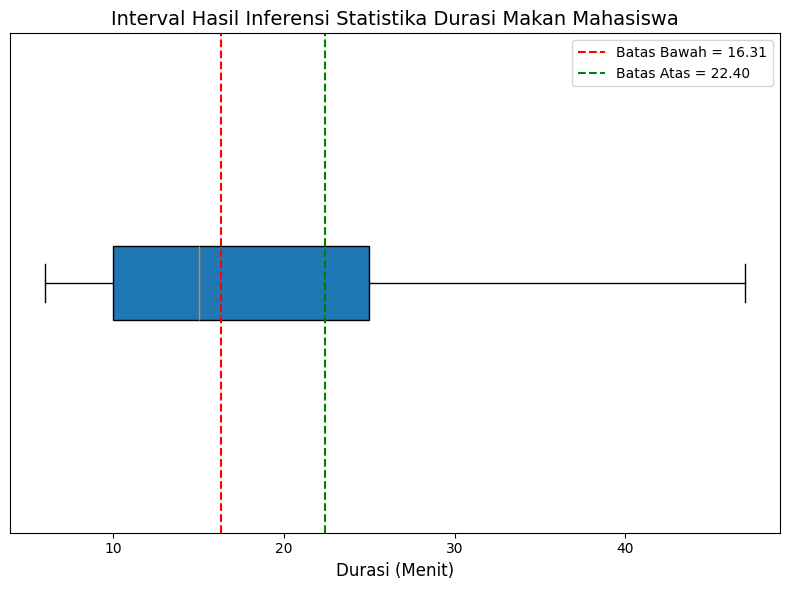

In [105]:
# Visualisasi boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(durasi_lelaki_array, vert=False, patch_artist=True, showfliers=False)

plt.axvline(x=batas_bawah, color='r', linestyle='--', label=f'Batas Bawah = {batas_bawah:.2f}')
plt.axvline(x=batas_atas, color='g', linestyle='--', label=f'Batas Atas = {batas_atas:.2f}')

plt.legend(loc='upper right')
plt.title('Interval Hasil Inferensi Statistika Durasi Makan Mahasiswa', fontsize=14)
plt.xlabel('Durasi (Menit)', fontsize=12)
plt.yticks([])
plt.tight_layout()
plt.show()

### 2. Analisis Statistika Inferensial 2 Sisi Rataan Sampel Perempuan

In [106]:
# menghitung estimasi 2 sisi interval rataan populasi berdasarkan rataan sampel

alpha = 0.05
# mencari nilai z_alpha_half sehingga P(Z>z_alpha_half) = 1 - alpha/2
z_alpha_half = stats.norm.ppf(1-alpha/2, loc=0, scale=1)

# menghitung standard error berdasarkan formula estimasi
standard_error = z_alpha_half * s_sampel_perempuan / np.sqrt(n_sampel_perempuan)

# menghitung batas bawah dan batas atas
batas_bawah = x_bar_sampel_perempuan - standard_error
batas_atas = x_bar_sampel_perempuan + standard_error

print("Estimasi 2 sisi rataan populasi")
print("-------------------------------")
print("Total data sampel\t: {}".format(n_sampel_perempuan))
print("Rata-rata data sampel\t: {}".format(x_bar_sampel_perempuan))
print("Stdev data sampel\t: {}".format(s_sampel_perempuan))
print("\n")
print("Tingkat kepercayaan estimasi\t: {}".format(1-alpha))
print("Batas bawah interval estimasi\t: {}".format(batas_bawah))
print("Batas atas interval estimasi\t: {}".format(batas_atas))

Estimasi 2 sisi rataan populasi
-------------------------------
Total data sampel	: 36
Rata-rata data sampel	: 17.86111111111111
Stdev data sampel	: 7.556086582646102


Tingkat kepercayaan estimasi	: 0.95
Batas bawah interval estimasi	: 15.392834850102329
Batas atas interval estimasi	: 20.329387372119893


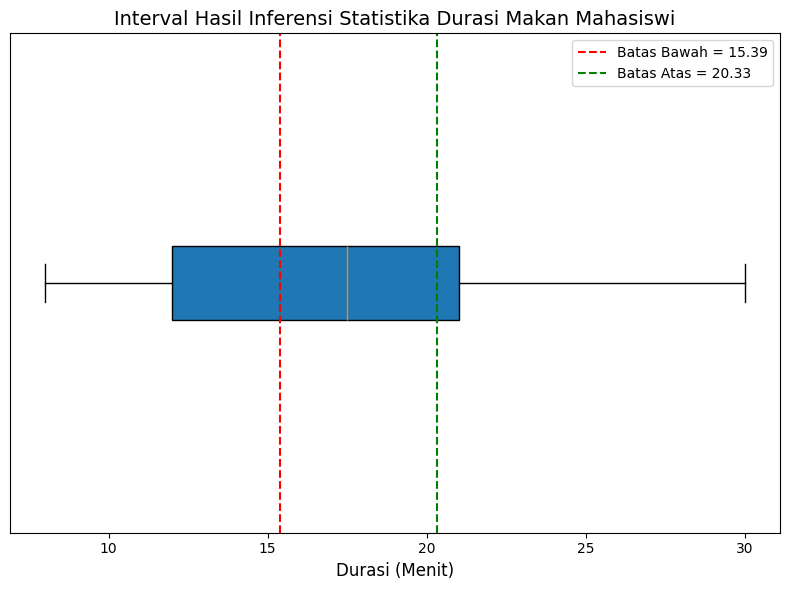

In [107]:
# Visualisasi boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(durasi_perempuan_array, vert=False, patch_artist=True, showfliers=False)

plt.axvline(x=batas_bawah, color='r', linestyle='--', label=f'Batas Bawah = {batas_bawah:.2f}')
plt.axvline(x=batas_atas, color='g', linestyle='--', label=f'Batas Atas = {batas_atas:.2f}')

plt.legend(loc='upper right')
plt.title('Interval Hasil Inferensi Statistika Durasi Makan Mahasiswi', fontsize=14)
plt.xlabel('Durasi (Menit)', fontsize=12)
plt.yticks([])
plt.tight_layout()
plt.show()

### Kesimpulan
Dengan tingkat kepercayaan sebesar 95% dan estimasi 2 sisi rataan populasi, batas bawah interval estimasi durasi makan laki-laki adalah 16.31 menit sedangkan perempuan adalah 15.39 menit. Hal tersebut menunjukkan bahwa batas bawah rataan durasi makan antara laki-laki dan perempuan hanya selisih sekitar 1 menit. Untuk batas atas, interval estimasi durasi makan laki-laki adalah 22.40 menit sedangkan perempuan adalah 20.33 menit. Hal tersebut menunjukkan bahwa batas atas rataan durasi makan antara laki-laki dan perempuan hanya selisih sekitar 2 menit. Dapat disimpulkan bahwa secara keseluruhan, perbedaan rata-rata durasi makan tidak melebihi 5 menit, sehingga kebijakan pengaturan shift makan berdasarkan jenis kelamin tidak perlu dipertimbangkan oleh manajemen. 